# Introduction

Goals:

* Visualize the results from the predicted structures

In [9]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_DIR = '/project/koohylab/bmcmaste/projects/tcr-pmhc-interface-analysis/data/predicted-structures-comparisons'

In [11]:
NOISE_LEVEL = 0.5  # Å

# *Apo*-*Holo* comparison of CDR loops

## Framework Alignment

In [4]:
fw_align = pd.read_csv(os.path.join(DATA_DIR, 'rmsd_cdr_fw_align_results.csv'))
fw_align

,complex_id,apo_rank,holo_rank,chain_type,cdr,rmsd
0,3498,2,2,alpha_chain,1,0.495213
1,3498,2,2,alpha_chain,2,0.396486
2,3498,2,2,alpha_chain,3,1.235845
3,3498,2,2,beta_chain,1,0.252804
4,3498,2,2,beta_chain,2,0.202426
...,...,...,...,...,...,...
149995,1029,0,3,alpha_chain,2,0.388038
149996,1029,0,3,alpha_chain,3,2.387513
149997,1029,0,3,beta_chain,1,0.321514
149998,1029,0,3,beta_chain,2,0.241162


(-0.75, 2.75)

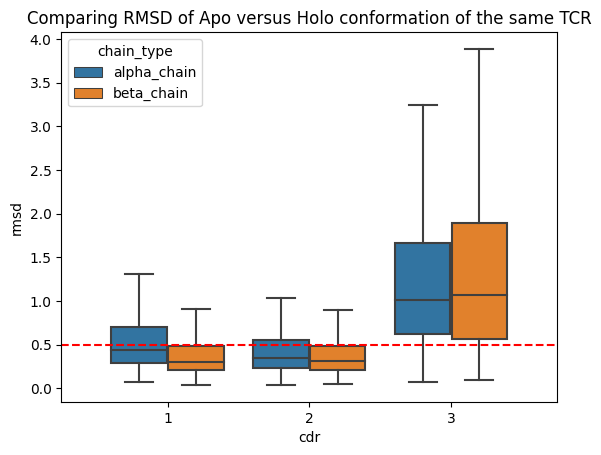

In [31]:
sns.boxplot(data=fw_align, y='rmsd', x='cdr', hue='chain_type', showfliers=False)
plt.title('Comparing RMSD of Apo versus Holo conformation of the same TCR')

x = np.linspace(-0.75, 2.75)
y = np.repeat(NOISE_LEVEL, len(x))

plt.plot(x, y, '--r')
plt.xlim(-0.75, 2.75)

## Loop Alignment

In [5]:
loop_align = pd.read_csv(os.path.join(DATA_DIR, 'rmsd_cdr_loop_align_results.csv'))
loop_align

,complex_id,apo_rank,holo_rank,chain_type,cdr,rmsd
0,3498,2,2,alpha_chain,1,0.126518
1,3498,2,2,alpha_chain,2,0.088419
2,3498,2,2,alpha_chain,3,0.414345
3,3498,2,2,beta_chain,1,0.064286
4,3498,2,2,beta_chain,2,0.047116
...,...,...,...,...,...,...
149995,1029,0,3,alpha_chain,2,0.109409
149996,1029,0,3,alpha_chain,3,1.649406
149997,1029,0,3,beta_chain,1,0.042410
149998,1029,0,3,beta_chain,2,0.130407


(-0.75, 2.75)

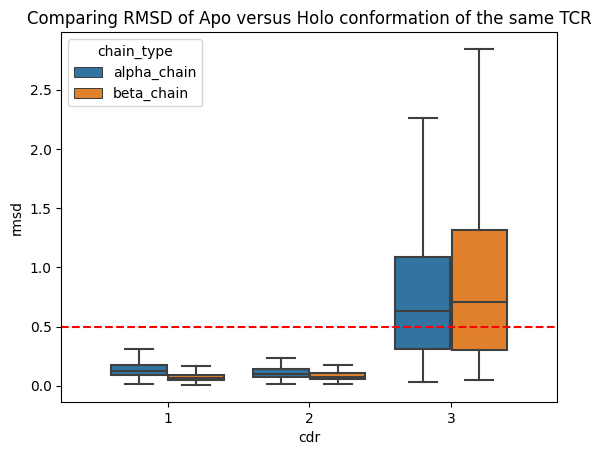

In [29]:
sns.boxplot(data=loop_align, y='rmsd', x='cdr', hue='chain_type', showfliers=False)
plt.title('Comparing RMSD of Apo versus Holo conformation of the same TCR')

x = np.linspace(-0.75, 2.75)
y = np.repeat(NOISE_LEVEL, len(x))

plt.plot(x, y, '--r')
plt.xlim(-0.75, 2.75)

# Deformation of CDR loops

In [15]:
per_residue_properties = pd.read_csv(os.path.join(DATA_DIR, 'per_residue_changes.csv'))
per_residue_properties

,complex_id,apo_rank,holo_rank,cdr,chain_type,residue_name,residue_seq_id,residue_insert_code,ca_distance,rmsd,chi_angle_change,com_distance
0,3498,2,2,1,alpha_chain,ASN,37,NaN,0.072404,0.783146,-0.008906,0.304234
1,3498,2,2,1,alpha_chain,ILE,28,NaN,0.181786,1.089114,NaN,0.293463
2,3498,2,2,1,alpha_chain,PHE,29,NaN,0.051761,0.321097,0.061005,0.118440
3,3498,2,2,1,alpha_chain,SER,27,NaN,0.183537,0.446247,0.343863,0.096380
4,3498,2,2,1,alpha_chain,THR,38,NaN,0.134166,0.766258,-0.036091,0.149306
...,...,...,...,...,...,...,...,...,...,...,...,...
1204145,1029,0,3,3,beta_chain,LEU,110,NaN,3.377010,2.393855,-0.076025,1.687768
1204146,1029,0,3,3,beta_chain,SER,106,NaN,1.905127,0.565559,0.036253,0.147431
1204147,1029,0,3,3,beta_chain,THR,107,NaN,0.608736,0.744318,0.120633,0.318578
1204148,1029,0,3,3,beta_chain,TYR,114,NaN,0.320166,4.770261,0.052754,3.637773


In [17]:
per_residue_properties['resi'] = per_residue_properties['residue_seq_id'].apply(str) + per_residue_properties['residue_insert_code'].fillna('')

## Residue C.O.M changes

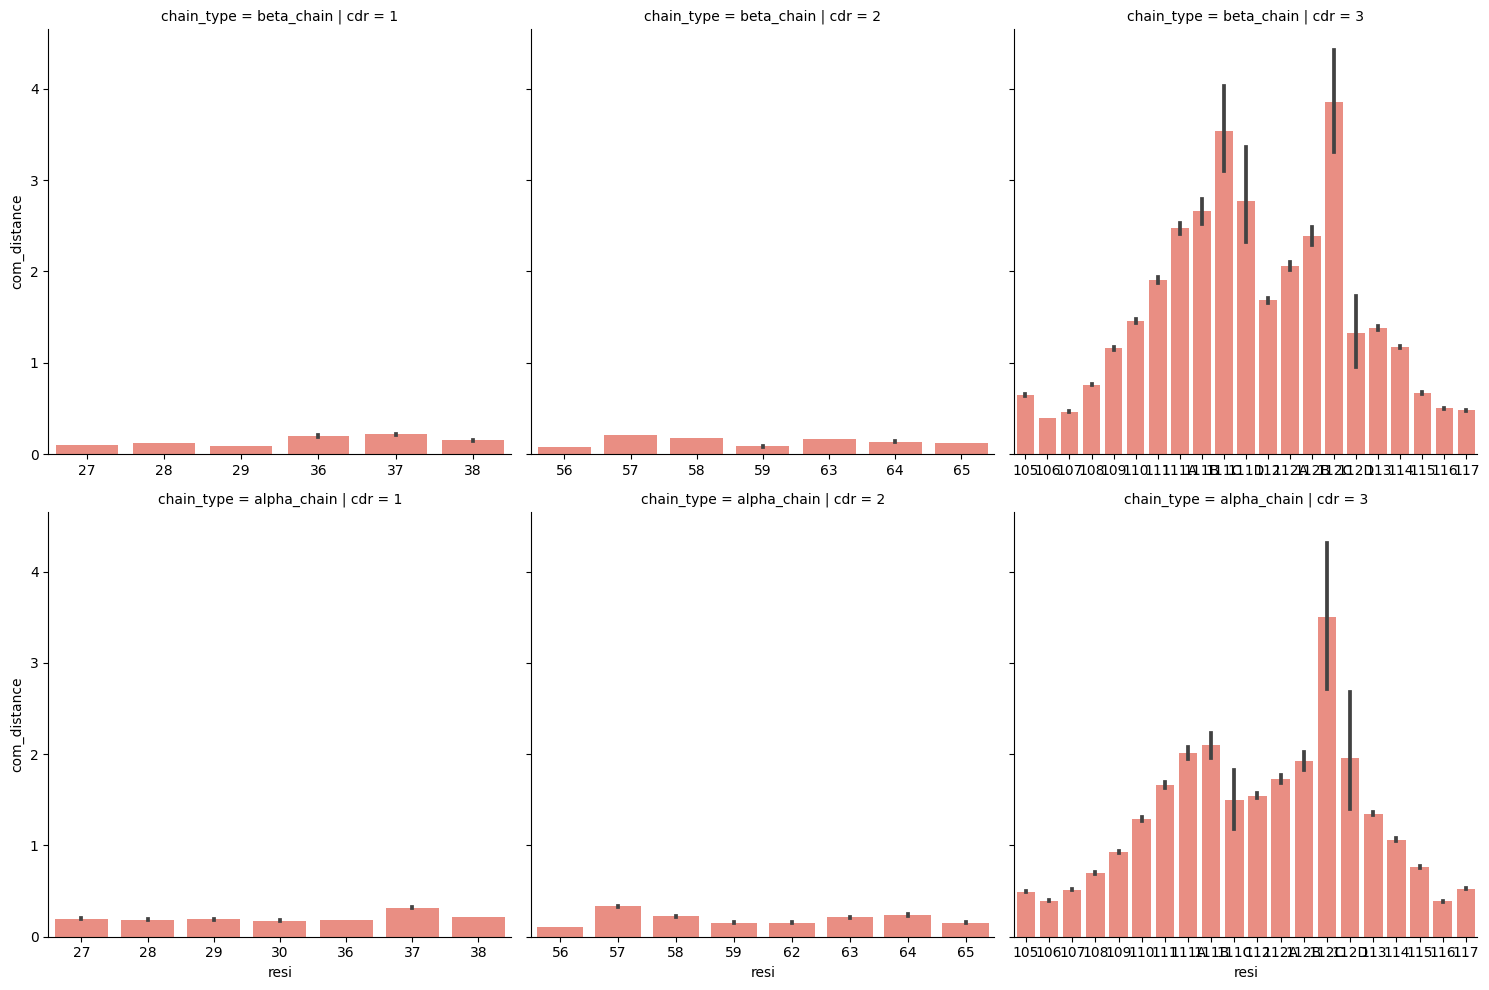

In [18]:
sns.catplot(per_residue_properties.sort_values('resi'),
            x='resi', y='com_distance',
            row='chain_type', col='cdr',
            color='salmon',
            sharex=False,
            kind='bar')

## RMSD changes

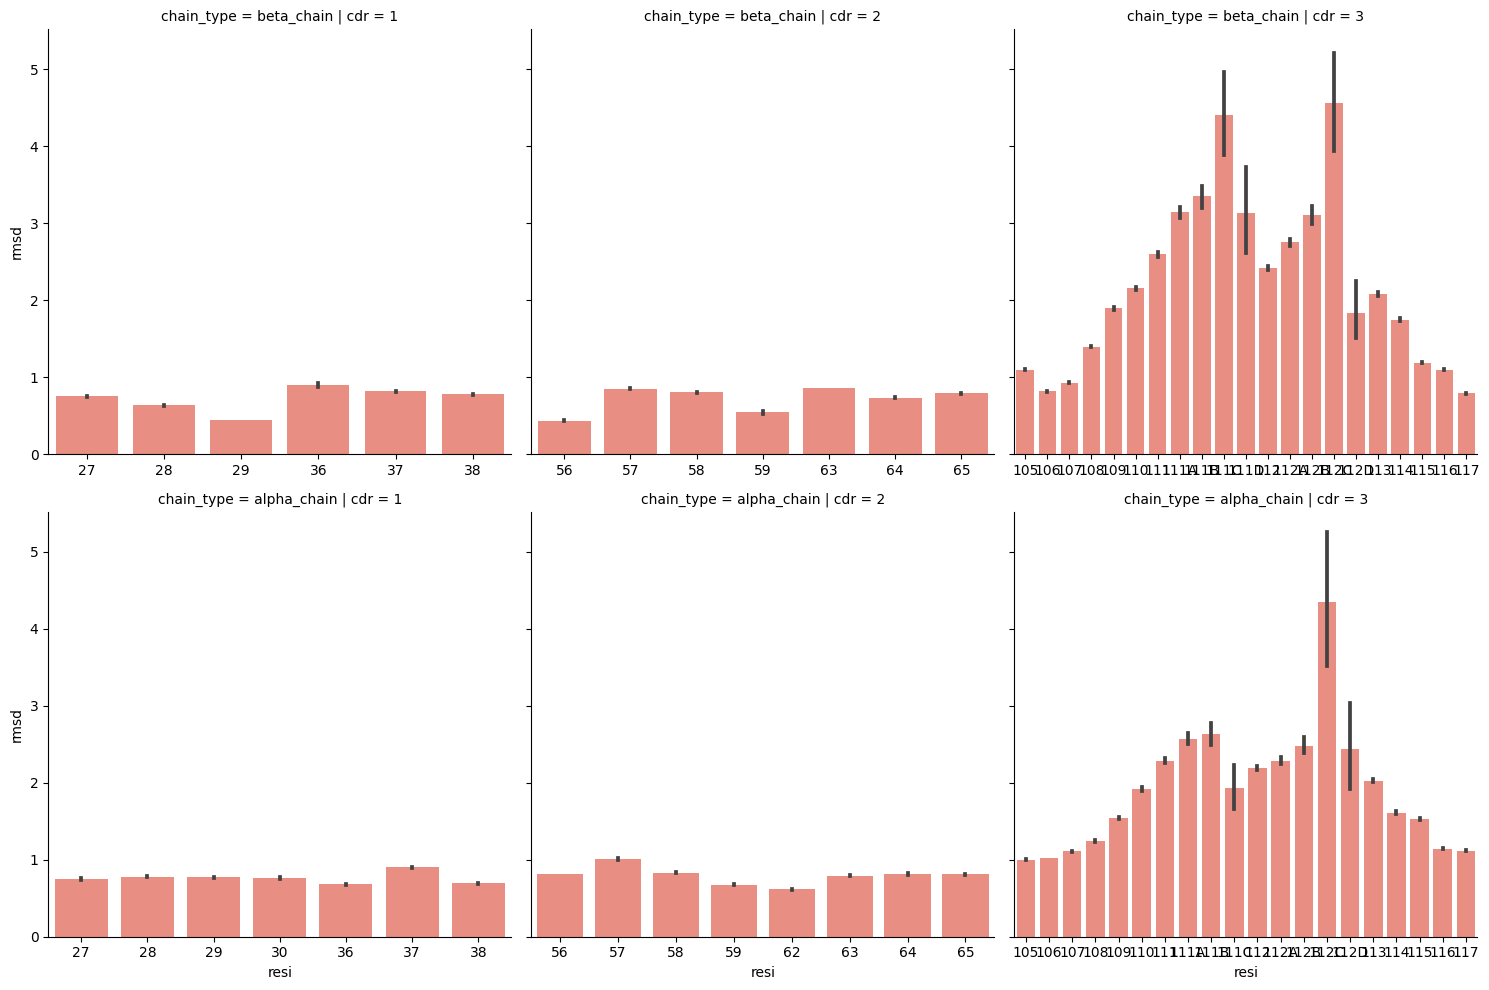

In [19]:
sns.catplot(per_residue_properties.sort_values('resi'),
            x='resi', y='rmsd',
            row='chain_type', col='cdr',
            color='salmon',
            sharex=False,
            kind='bar')

## C$\alpha$ distance changes

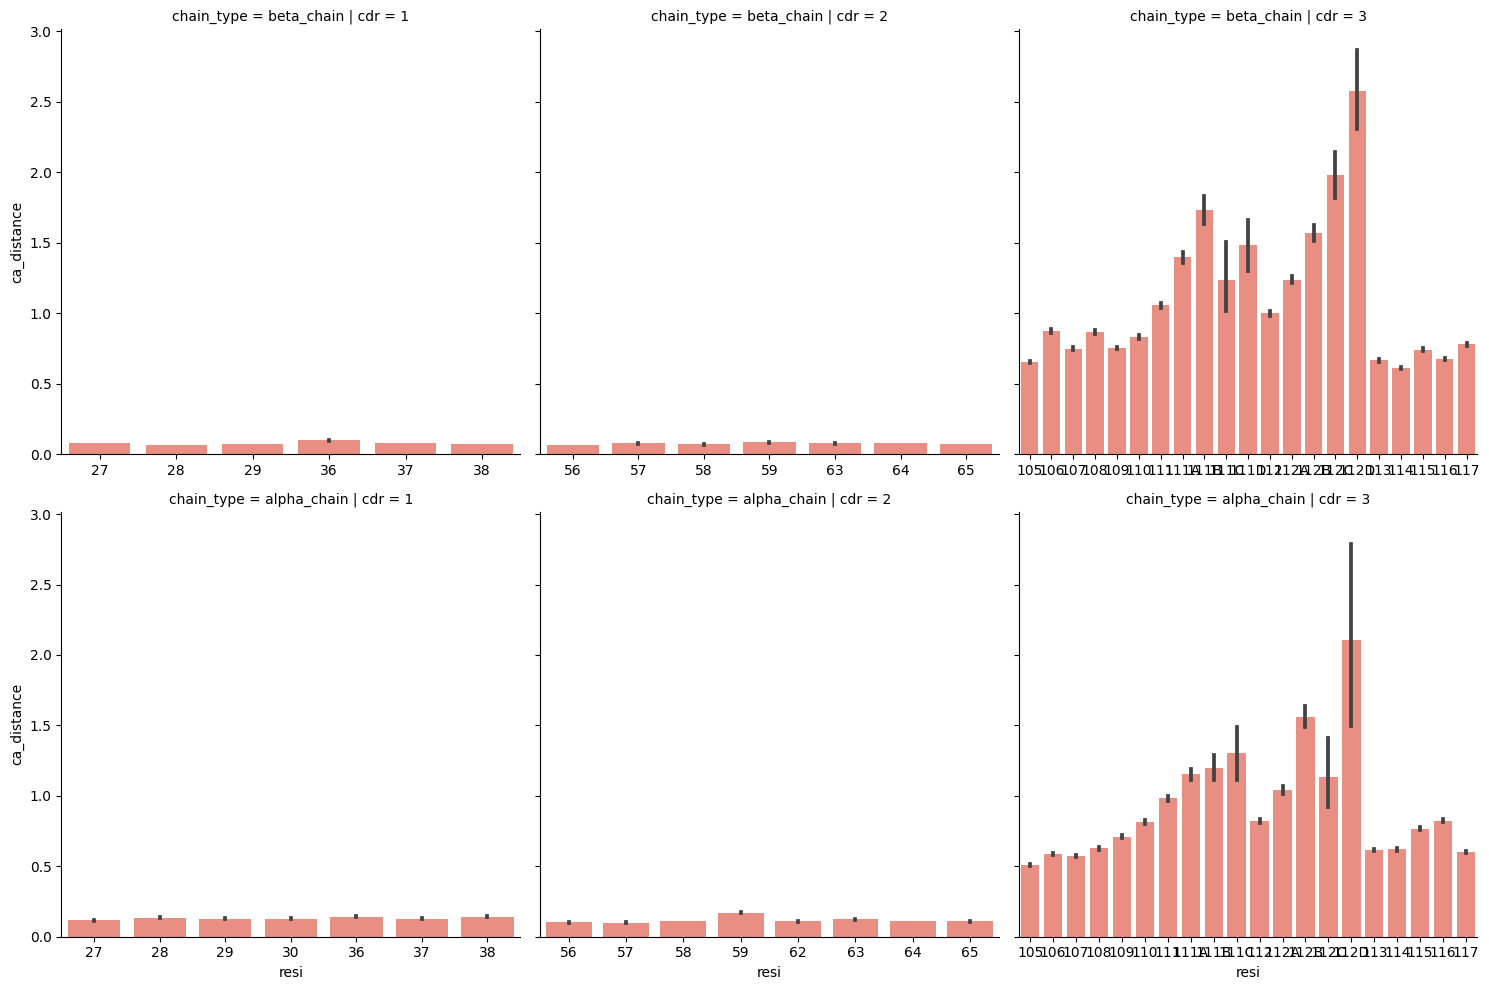

In [20]:
sns.catplot(per_residue_properties.sort_values('resi'),
            x='resi', y='ca_distance',
            row='chain_type', col='cdr',
            color='salmon',
            sharex=False,
            kind='bar')

## $\chi$-angle changes

In [25]:
per_residue_properties['chi_angle_change_deg_mag'] = per_residue_properties['chi_angle_change'].apply(np.degrees).apply(np.abs)

/package/python-cbrg/current/3.11/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/package/python-cbrg/current/3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/package/python-cbrg/current/3.11/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/package/python-cbrg/current/3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/package/python-cbrg/current/3.11/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/package/python-cbrg/current/3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  retu

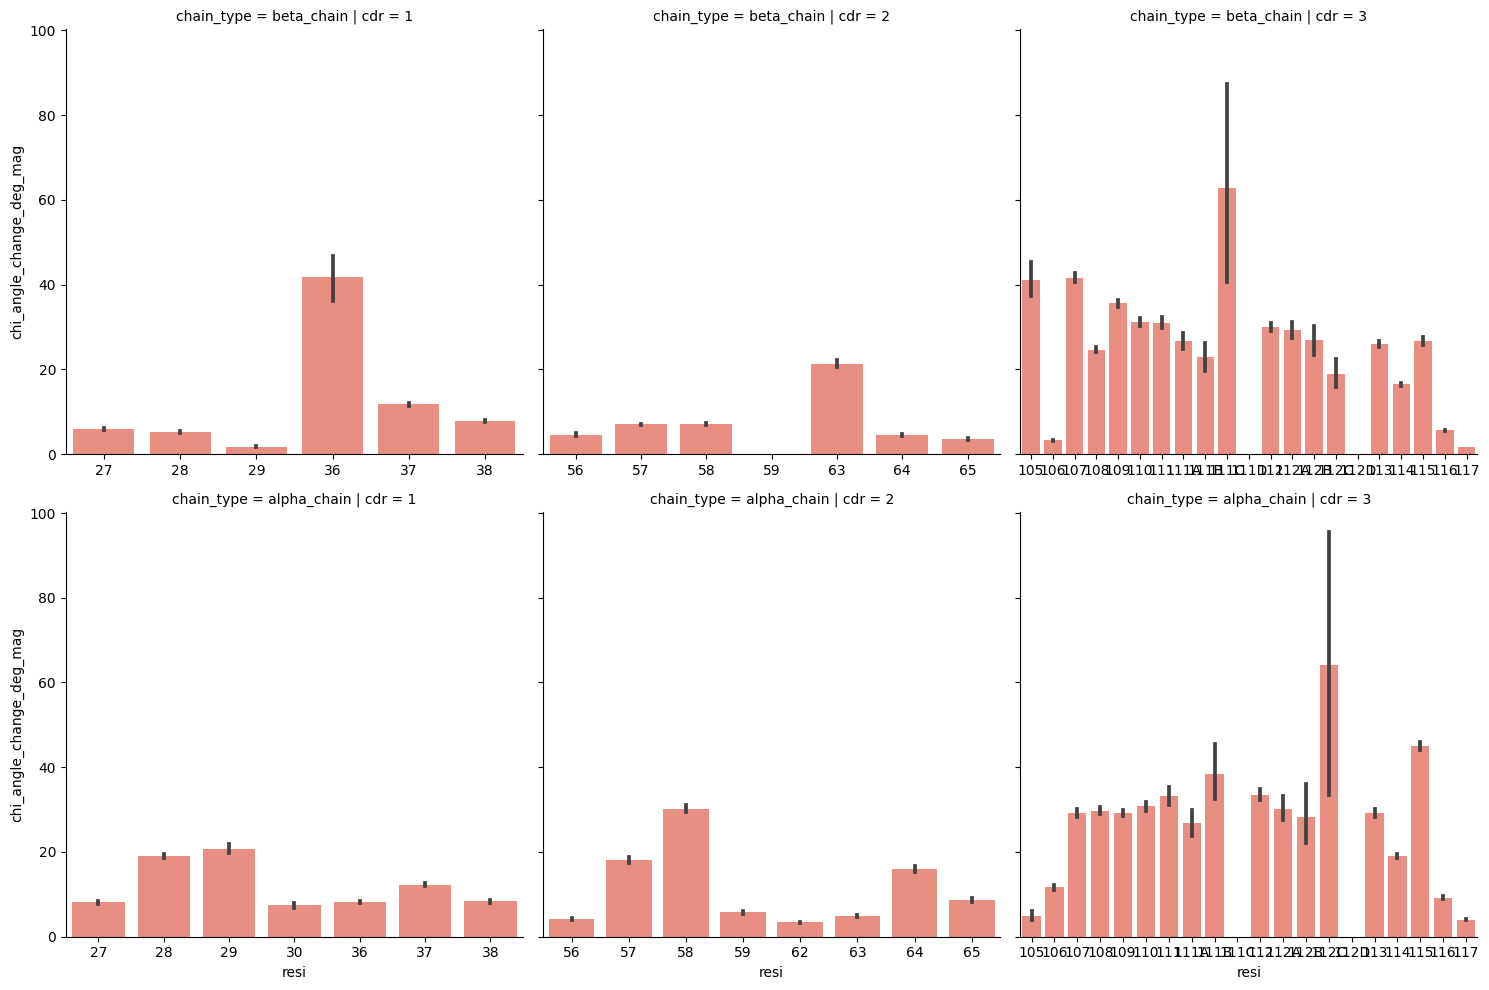

In [26]:
sns.catplot(per_residue_properties.sort_values('resi'),
            x='resi', y='chi_angle_change_deg_mag',
            row='chain_type', col='cdr',
            color='salmon',
            sharex=False,
            kind='bar')